# Virat Kohli v/s Joe Root in Test Cricket

In [194]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#to display all rows columns 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [198]:
df = pd.read_csv('Men Test Player Innings Stats - 21st Century.csv')

In [199]:
df.head()

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate
0,AN Cook,294,294,773,1.0,0.0,545,33,0,53.94,2,v India,Birmingham,2011/08/10,England,0.0,1.0,200+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AN Cook,263,263,836,1.0,0.0,528,18,0,49.81,2,v Pakistan,Abu Dhabi,2015/10/13,England,0.0,1.0,200+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BA Stokes,258,258,338,1.0,0.0,198,30,11,130.30,1,v South Africa,Cape Town,2016/01/02,England,0.0,1.0,200+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,JE Root,254,254,614,1.0,0.0,406,27,0,62.56,1,v Pakistan,Manchester,2016/07/22,England,0.0,1.0,200+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AN Cook,244*,244,634,1.0,1.0,409,27,0,59.65,2,v Australia,Melbourne,2017/12/26,England,0.0,1.0,200+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [200]:
df.shape

(208778, 28)

In [201]:
df['Innings Runs Scored Num'].unique()

array(['294', '263', '258', '254', '244', '243', '235', '227', '226',
       '221', '219', '206', '203', '202', '200', '199', '197', '195',
       '194', '193', '190', '189', '186', '184', '183', '182', '180',
       '177', '176', '175', '173', '169', '168', '167', '166', '162',
       '161', '160', '159', '158', '156', '155', '154', '152', '151',
       '150', '149', '148', '147', '146', '145', '144', '143', '142',
       '141', '140', '139', '138', '137', '136', '135', '134', '133',
       '132', '131', '130', '129', '128', '127', '126', '125', '124',
       '123', '122', '121', '120', '119', '118', '117', '116', '115',
       '114', '113', '112', '111', '110', '109', '108', '107', '106',
       '105', '104', '103', '102', '101', '100', '99', '98', '97', '96',
       '95', '94', '93', '92', '91', '90', '89', '88', '87', '86', '85',
       '84', '83', '82', '81', '80', '79', '78', '77', '76', '75', '74',
       '73', '72', '71', '70', '69', '68', '67', '66', '65', '64', '63',
       '

In [202]:
df = df[df['Innings Runs Scored Num'] != '-']

In [203]:
# df['Innings Runs Scored Num'].unique()

In [204]:
df = df.dropna(subset=['Innings Runs Scored Num'])
df['Innings Runs Scored Num'].unique()

array(['294', '263', '258', '254', '244', '243', '235', '227', '226',
       '221', '219', '206', '203', '202', '200', '199', '197', '195',
       '194', '193', '190', '189', '186', '184', '183', '182', '180',
       '177', '176', '175', '173', '169', '168', '167', '166', '162',
       '161', '160', '159', '158', '156', '155', '154', '152', '151',
       '150', '149', '148', '147', '146', '145', '144', '143', '142',
       '141', '140', '139', '138', '137', '136', '135', '134', '133',
       '132', '131', '130', '129', '128', '127', '126', '125', '124',
       '123', '122', '121', '120', '119', '118', '117', '116', '115',
       '114', '113', '112', '111', '110', '109', '108', '107', '106',
       '105', '104', '103', '102', '101', '100', '99', '98', '97', '96',
       '95', '94', '93', '92', '91', '90', '89', '88', '87', '86', '85',
       '84', '83', '82', '81', '80', '79', '78', '77', '76', '75', '74',
       '73', '72', '71', '70', '69', '68', '67', '66', '65', '64', '63',
       '

In [205]:
# convert to datetime
df['Innings Date'] = pd.to_datetime(df['Innings Date'])

In [206]:
df['year'] = df['Innings Date'].dt.year

In [207]:
df.head((2))

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,year
0,AN Cook,294,294,773,1.0,0.0,545,33,0,53.94,2,v India,Birmingham,2011-08-10,England,0.0,1.0,200+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011
1,AN Cook,263,263,836,1.0,0.0,528,18,0,49.81,2,v Pakistan,Abu Dhabi,2015-10-13,England,0.0,1.0,200+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015


In [208]:
df.dtypes

Innings Player                   object        
Innings Runs Scored              object        
Innings Runs Scored Num          object        
Innings Minutes Batted           object        
Innings Batted Flag              float64       
Innings Not Out Flag             float64       
Innings Balls Faced              object        
Innings Boundary Fours           object        
Innings Boundary Sixes           object        
Innings Batting Strike Rate      object        
Innings Number                   object        
Opposition                       object        
Ground                           object        
Innings Date                     datetime64[ns]
Country                          object        
50's                             float64       
100's                            float64       
Innings Runs Scored Buckets      object        
Innings Overs Bowled             object        
Innings Bowled Flag              float64       
Innings Maidens Bowled           object 

In [209]:
df['Innings Runs Scored Num'] = df['Innings Runs Scored Num'].astype('int')
df['Innings Balls Faced'] = df['Innings Balls Faced'].astype('int')

In [210]:
df.dtypes

Innings Player                   object        
Innings Runs Scored              object        
Innings Runs Scored Num          int32         
Innings Minutes Batted           object        
Innings Batted Flag              float64       
Innings Not Out Flag             float64       
Innings Balls Faced              int32         
Innings Boundary Fours           object        
Innings Boundary Sixes           object        
Innings Batting Strike Rate      object        
Innings Number                   object        
Opposition                       object        
Ground                           object        
Innings Date                     datetime64[ns]
Country                          object        
50's                             float64       
100's                            float64       
Innings Runs Scored Buckets      object        
Innings Overs Bowled             object        
Innings Bowled Flag              float64       
Innings Maidens Bowled           object 

In [211]:
# virat's debut in 2011 and Root's debut in 2012
# virat's first century in 2012 and Root's first century in 2013
# so we consider their respective data from the year of their first century

In [212]:
virat_df = df[df['year'] >= 2012]
virat_df.head(1)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,year
1,AN Cook,263,263,836,1.0,0.0,528,18,0,49.81,2,v Pakistan,Abu Dhabi,2015-10-13,England,0.0,1.0,200+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015


In [213]:
root_df = df[df['year'] >= 2013]
root_df.head(1)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,year
1,AN Cook,263,263,836,1.0,0.0,528,18,0,49.81,2,v Pakistan,Abu Dhabi,2015-10-13,England,0.0,1.0,200+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015


In [214]:
df['Innings Player'].unique()

array(['AN Cook', 'BA Stokes', 'JE Root', 'IR Bell', 'KP Pietersen',
       'IJL Trott', 'RWT Key', 'ME Trescothick', 'PD Collingwood',
       'GP Thorpe', 'MP Vaughan', 'AJ Strauss', 'MA Butcher', 'SCJ Broad',
       'JM Bairstow', 'A Flintoff', 'GS Ballance', 'MM Ali', 'N Hussain',
       'KK Jennings', 'RS Bopara', 'DJ Malan', 'CR Woakes', 'OJ Pope',
       'DP Sibley', 'MR Ramprakash', 'RJ Burns', 'MJ Prior', 'EJG Morgan',
       'SD Robson', 'AJ Stewart', 'C White', 'NRD Compton', 'A Lyth',
       'BT Foakes', 'JC Buttler', 'TR Ambrose', 'JP Crawley', 'GO Jones',
       'AD Hales', 'JL Denly', 'MJ Leach', 'TT Bresnan', 'OA Shah',
       'GP Swann', 'JM Vince', 'H Hameed', 'A McGrath', 'JM Anderson',
       'SM Curran', 'JWA Taylor', 'JJ Roy', 'LA Dawson', 'Z Crawley',
       'ET Smith', 'AU Rashid', 'MA Carberry', 'MD Stoneman', 'AF Giles',
       'T Westley', 'MA Atherton', 'DM Bess', 'ST Finn', 'BM Duckett',
       'LE Plunkett', 'R Clarke', 'CMW Read', 'U Afzaal', 'DG Cork',
  

# Parameters we are going to calculate

In [215]:
vdf = virat_df[virat_df['Innings Player'] == 'V Kohli']
len(vdf)

406

In [216]:
vdf = vdf.drop_duplicates(subset=['Innings Date','Innings Number'])
len(vdf)

136

In [217]:
vdf.head(2)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,year
33587,V Kohli,254*,254,-,1.0,1.0,336,33,2,75.59,1,v South Africa,Pune,2019-10-10,India,0.0,1.0,200+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
33590,V Kohli,243,243,447,1.0,0.0,287,25,0,84.66,1,v Sri Lanka,Delhi,2017-12-02,India,0.0,1.0,200+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017


In [218]:
rdf = root_df[root_df['Innings Player'] == 'JE Root']
len(rdf)

501

In [219]:
rdf = rdf.drop_duplicates(subset=['Innings Date','Innings Number'])
len(vdf)

136

In [220]:
rdf.head(2)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,year
3,JE Root,254,254,614,1.0,0.0,406,27,0,62.56,1,v Pakistan,Manchester,2016-07-22,England,0.0,1.0,200+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016
11,JE Root,226,226,636,1.0,0.0,441,22,1,51.24,2,v New Zealand,Hamilton,2019-11-29,England,0.0,1.0,200+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


In [221]:
# to find RPI 
sum(vdf['Innings Runs Scored Num'])

7038

In [222]:
sum(rdf['Innings Runs Scored Num'])

7506

In [223]:
# RPI: virat & root
sum(vdf['Innings Runs Scored Num'])/len(vdf), sum(rdf['Innings Runs Scored Num'])/len(rdf)

(51.75, 44.946107784431135)

In [224]:
# SR: virat & root
100*sum(vdf['Innings Runs Scored Num'])/sum(vdf['Innings Balls Faced']), 100*sum(rdf['Innings Runs Scored Num'])/sum(rdf['Innings Balls Faced'])

(58.26641278251511, 55.00512970833944)

In [225]:
# total 100's: virat & root
sum(vdf["100's"]), sum(rdf["100's"])

(27.0, 17.0)

In [226]:
#team contribution
100*sum(vdf['Innings Runs Scored Num'])/sum(virat_df[virat_df.Country == 'India']['Innings Runs Scored Num'])

5.530279814242946

In [227]:
100*sum(rdf['Innings Runs Scored Num'])/sum(root_df[root_df.Country == 'England']['Innings Runs Scored Num'])

5.325670498084291

In [228]:
# as we know these two players represent two different countries, there may be more factors affecting their runs, so we 
# consider normalized values of required values

# Normalization

In [229]:
# for this we should consider other player's(excluding virat and root in their respective countries) runs also 

In [230]:
non_virat_df = virat_df[virat_df['Innings Player'] != 'V Kohli']

In [231]:
non_virat_df = non_virat_df[non_virat_df['Country'] == 'India']

In [232]:
# non_virat_df['Innings Player'].unique()

In [233]:
non_root_df = root_df[root_df['Innings Player'] != 'JE Root']

In [234]:
non_root_df = non_root_df[non_root_df['Country'] == 'England']

In [235]:
# 1. RPI 

In [254]:
# virat's rpi/ non-virat's rpi
np.round((sum(vdf['Innings Runs Scored Num'])/len(vdf))/(sum(non_virat_df['Innings Runs Scored Num'])/len(non_virat_df)),2)

1.84

In [255]:
# root's rpi/ non-root's rpi
np.round((sum(rdf['Innings Runs Scored Num'])/len(rdf))/(sum(non_root_df['Innings Runs Scored Num'])/len(non_root_df)),2)

1.82

In [238]:
# 2. SR

In [256]:
# virat's sr/ non-virat's sr
np.round((sum(vdf['Innings Runs Scored Num'])/sum(vdf['Innings Balls Faced']))/(sum(non_virat_df['Innings Runs Scored Num'])/sum(non_virat_df['Innings Balls Faced'])),3)

1.109

In [257]:
# root's sr/ non-root's sr
np.round((sum(rdf['Innings Runs Scored Num'])/sum(rdf['Innings Balls Faced']))/(sum(non_root_df['Innings Runs Scored Num'])/sum(non_root_df['Innings Balls Faced'])),3)

1.111

In [241]:
# 3.Number of matches to score 100: lesser the better!!

In [258]:
# virat's/non-virat's
np.round((len(vdf)/sum(vdf["100's"]))/(len(non_virat_df)/sum(non_virat_df["100's"])),2)

0.31

In [259]:
# root's/non-root's
np.round((len(rdf)/sum(rdf["100's"]))/(len(non_root_df)/sum(non_root_df["100's"])),2)

0.34

# Visualizations

In [244]:
# 4. Here we are going to see virat's and root's consistency over the years: by graph and by coefficient of variation(std/mean)

In [245]:
vdf.describe()

,Innings Runs Scored Num,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,50's,100's,Innings Bowled Flag,4 Wickets,5 Wickets,10 Wickets,year
count,136.000000,136.0,136.000000,136.000000,136.000000,136.000000,0.0,0.0,0.0,0.0,136.000000
mean,51.750000,1.0,0.073529,88.816176,0.147059,0.198529,NaN,NaN,NaN,NaN,2015.691176
std,58.086876,0.0,0.261968,86.134022,0.355474,0.400367,NaN,NaN,NaN,NaN,2.311051
min,0.000000,1.0,0.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,2012.000000
25%,9.750000,1.0,0.000000,22.750000,0.000000,0.000000,NaN,NaN,NaN,NaN,2014.000000
50%,30.000000,1.0,0.000000,60.500000,0.000000,0.000000,NaN,NaN,NaN,NaN,2016.000000
75%,75.250000,1.0,0.000000,127.500000,0.000000,0.000000,NaN,NaN,NaN,NaN,2018.000000
max,254.000000,1.0,1.000000,366.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,2020.000000


In [260]:
print("Coefficient of variation of Virat's runs scored is",np.round(58.086876/51.750000,2))

Coefficient of variation of Virat's runs scored is 1.12


In [247]:
rdf.describe()

,Innings Runs Scored Num,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,50's,100's,Innings Bowled Flag,4 Wickets,5 Wickets,10 Wickets,year
count,167.000000,167.0,167.000000,167.000000,167.000000,167.000000,0.0,0.0,0.0,0.0,167.000000
mean,44.946108,1.0,0.065868,81.712575,0.281437,0.101796,NaN,NaN,NaN,NaN,2016.161677
std,47.579516,0.0,0.248798,76.999069,0.451053,0.303290,NaN,NaN,NaN,NaN,2.069041
min,0.000000,1.0,0.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,2013.000000
25%,8.500000,1.0,0.000000,22.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,2015.000000
50%,29.000000,1.0,0.000000,57.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,2016.000000
75%,66.500000,1.0,0.000000,123.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,2018.000000
max,254.000000,1.0,1.000000,441.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,2020.000000


In [261]:
print("Coefficient of variation of Root's runs scored is", np.round(47.579516/44.946108,2))

Coefficient of variation of Root's runs scored is 1.06


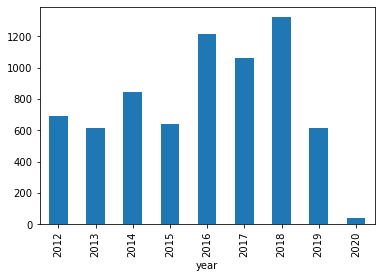

In [249]:
vdf.groupby(['year'])['Innings Runs Scored Num'].sum().plot(kind='bar')
plt.show()

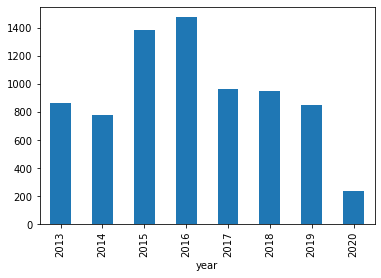

In [250]:
rdf.groupby(['year'])['Innings Runs Scored Num'].sum().plot(kind='bar')
plt.show()

# Team Contribution: tie breaker

In [251]:
# 5. team contribution: Here we are already comparing with rest of the team, hence no need of a normalization

In [252]:
# virat
np.round(100*sum(vdf['Innings Runs Scored Num'])/sum(virat_df[virat_df.Country == 'India']['Innings Runs Scored Num']),2)

5.53

In [253]:
# root
np.round(100*sum(rdf['Innings Runs Scored Num'])/sum(root_df[root_df.Country == 'England']['Innings Runs Scored Num']),2)

5.33